# <center>**ML Project - Bank Marketing Prediction**</center>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [184]:
# importing the data from drive
df = pd.read_csv (r'D:\Board Infinity\ml\ML Project1_BMP\bank-marketing.csv')
df.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,120000,divorced,tertiary,no,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,55000,married,primary,yes,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,60000,single,secondary,yes,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Read in the file and get basic information about the data, including numerical summaries.

In [185]:
# finding the no. row and column in the data
df.shape

(45211, 19)

In [186]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [187]:
df1=df.select_dtypes(include=['object'])

In [188]:
# nunique gives no. of unique values in each column
df1.nunique()

job          12
marital       3
education     4
targeted      2
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
response      2
dtype: int64

In [189]:
for col in df1:
    print(len(df1[col].unique()),'  ',col,'=',df1[col].unique(),end="\n\n")

12    job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

3    marital = ['married' 'single' 'divorced']

4    education = ['tertiary' 'secondary' 'unknown' 'primary']

2    targeted = ['yes' 'no']

2    default = ['no' 'yes']

2    housing = ['yes' 'no']

2    loan = ['no' 'yes']

3    contact = ['unknown' 'cellular' 'telephone']

12    month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

4    poutcome = ['unknown' 'failure' 'other' 'success']

2    response = ['no' 'yes']



### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [190]:
print("Mean of the pdays is :",df['pdays'].mean())
print("Median of the pdays is :",df['pdays'].median())
print("Minimum of the pdays is :",df['pdays'].min())

Mean of the pdays is : 40.19782796222158
Median of the pdays is : -1.0
Minimum of the pdays is : -1


In [191]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

The Pdays Columan signifies that, The number of days that passed by after the client was last contacted from a previous campaign  that means pdays cant be negative, like -1 so we can say that it is an outlier.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [192]:
df3=df.copy()
df3

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [193]:
index_names = df3[ df3['pdays'] == -1].index
df3.drop(index_names, inplace = True)

In [194]:
df3.pdays.value_counts()

182    167
92     147
91     126
183    126
181    117
      ... 
3        1
850      1
842      1
826      1
603      1
Name: pdays, Length: 558, dtype: int64

In [195]:
df3.pdays.mean()-df3.pdays.median()

30.577691655564962

### Plot a horizontal bar graph with the median values of balance for each education level value.Which group has the highest median?

In [196]:
df2=df[['education', 'balance']] 
#df2
edu_df=(df2.groupby("education").median())
edu_df

,balance
education,
primary,403
secondary,392
tertiary,577
unknown,568


<AxesSubplot:xlabel='balance', ylabel='education'>

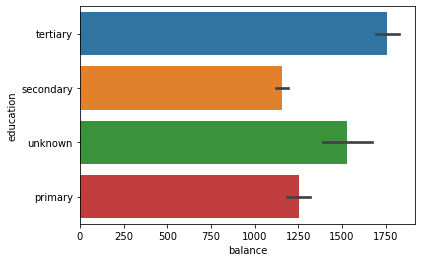

In [197]:
sns.barplot(y="education",x="balance",data=df2)

### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

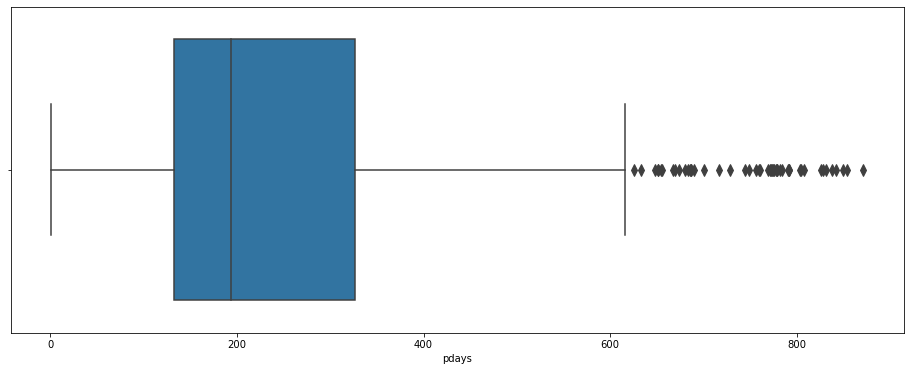

In [198]:
plt.figure(figsize=(16, 6))
sns.boxplot(df3['pdays'],fliersize=8)

## First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.

### Convert the response variable to a convenient form

In [199]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder() 
df.response = le.fit_transform(df.response)
df.marital = le.fit_transform(df.marital)
df.job = le.fit_transform(df.job)  
df.education = le.fit_transform(df.education) 
df.targeted = le.fit_transform(df.targeted)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)
df.poutcome = le.fit_transform(df.poutcome)

### Make suitable plots for associations with numerical features and categorical features’

In [202]:
cat_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=='O':
      cat_col.append(col)
    else:
      num_col.append(col)

In [203]:
print("catogorical features :",cat_col)
print("numarical features :",num_col)

catogorical features : []
numarical features : ['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response']


In [204]:
for col in cat_col[0:-1]:
    plt.figure(figsize=(6,4))
    sns.barplot(df[col],df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

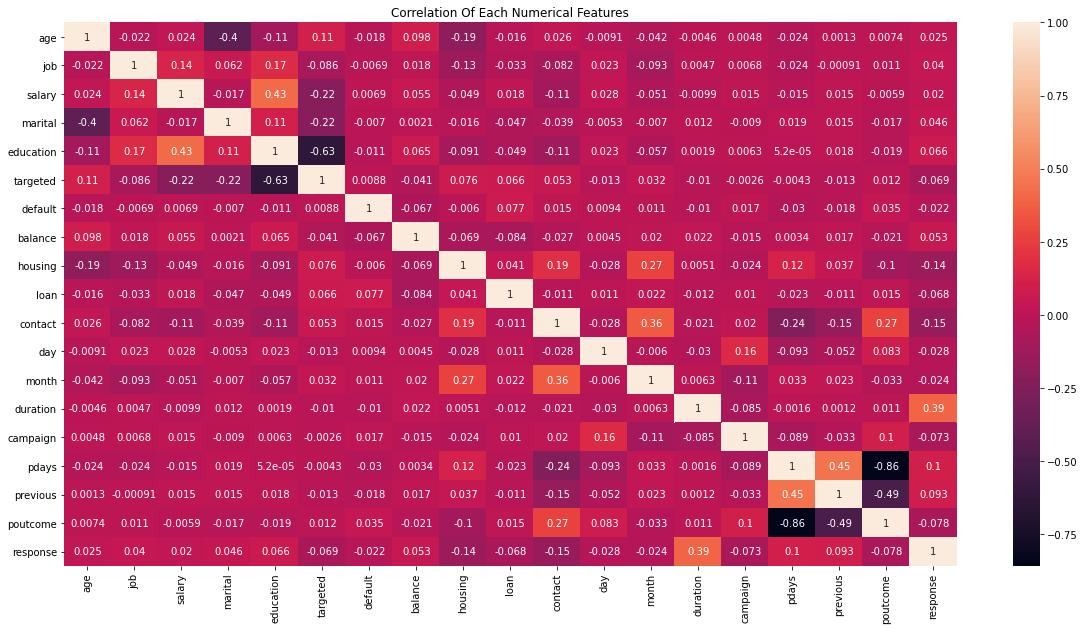

In [205]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Of Each Numerical Features")
plt.show()

In [206]:
df.corr()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
age,1.000000,-0.021868,0.024357,-0.403240,-0.106807,0.113202,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.141655,0.062045,0.166707,-0.085926,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
salary,0.024357,0.141655,1.000000,-0.016633,0.425256,-0.222868,0.006860,0.055469,-0.048965,0.017749,-0.108612,0.027864,-0.050723,-0.009937,0.015005,-0.014968,0.014564,-0.005864,0.020012
marital,-0.403240,0.062045,-0.016633,1.000000,0.108576,-0.219610,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.425256,0.108576,1.000000,-0.627959,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
targeted,0.113202,-0.085926,-0.222868,-0.219610,-0.627959,1.000000,0.008825,-0.040699,0.075543,0.066297,0.053247,-0.012891,0.031828,-0.010280,-0.002597,-0.004350,-0.013253,0.011885,-0.069039
default,-0.017879,-0.006853,0.006860,-0.007023,-0.010718,0.008825,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.055469,0.002122,0.064514,-0.040699,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.048965,-0.016096,-0.090790,0.075543,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,0.017749,-0.046893,-0.048574,0.066297,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185


In [207]:
pd.crosstab(df1['poutcome'], df1['response'])

response,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


## Are the features about the previous campaign data useful?

In [208]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

yes,it is important to know the  number of contacts performed before this campaign and for this client

## Are pdays and poutcome associated with the target?

In [209]:
df.drop(["pdays","targeted","poutcome"],axis=1)

,age,job,salary,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,response
0,58,4,100000,1,2,0,2143,1,0,2,5,8,261,1,0,0
1,44,9,60000,2,1,0,29,1,0,2,5,8,151,1,0,0
2,33,2,120000,1,1,0,2,1,1,2,5,8,76,1,0,0
3,47,1,20000,1,3,0,1506,1,0,2,5,8,92,1,0,0
4,33,11,0,2,3,0,1,0,0,2,5,8,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,60000,1,2,0,825,0,0,0,17,9,977,3,0,1
45207,71,5,55000,0,0,0,1729,0,0,0,17,9,456,2,0,1
45208,72,5,55000,1,1,0,5715,0,0,0,17,9,1127,5,3,1
45209,57,1,20000,1,1,0,668,0,0,1,17,9,508,4,0,0


No, they are not associated

In pdays column 81% of data contain -1 values thus, we need to Drop that column

## Train Test Split

In [210]:
x=df.drop("response",axis=1) 
y=df.response

In [211]:
x=x.values
y=y.values

In [212]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=10)

## Predictive model 1: Logistic regression

In [213]:
from sklearn import preprocessing as pre_pro
from sklearn.linear_model import LogisticRegression as log_reg
no=pre_pro.LabelEncoder()

In [214]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [215]:
cv_score= cross_val_score(lr,xtrain,ytrain, cv=5)
np.mean(cv_score*100)

88.66242530122256

In [216]:
ypred = lr.predict(xtest)

In [217]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12006
           1       0.56      0.17      0.26      1558

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [218]:
confusion_matrix(ypred,ytest)

array([[11803,  1298],
       [  203,   260]], dtype=int64)

In [219]:
f1_score(ypred,ytest)

0.2572983671449777

In [220]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(lr, 5)
rfe1.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [221]:
rfe1.support_

array([False, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False, False])

In [222]:
x_train=pd.DataFrame(xtrain)
x_test=pd.DataFrame(xtest)

In [223]:
cols = x_train.columns[rfe1.support_]

In [224]:
lr.fit(x_train[cols],ytrain)

LogisticRegression()

In [225]:
y_pred2 = lr.predict(x_test[cols])

In [226]:
f1_score(y_pred2,ytest)

0.0

In [227]:
confusion_matrix(y_pred2,ytest)

array([[12006,  1558],
       [    0,     0]], dtype=int64)

In [228]:
import statsmodels.api as sm

In [229]:
x_train_sm = sm.add_constant(x_train[cols])
x_train_sm.head()

,const,5,6,8,9,10
0,1.0,1,0,1,0,0
1,1.0,1,0,0,0,2
2,1.0,1,0,1,0,0
3,1.0,1,0,1,1,2
4,1.0,1,0,0,0,0


In [230]:
lr1 = sm.OLS(ytrain, x_train_sm).fit()

In [231]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     284.4
Date:                Sun, 28 Mar 2021   Prob (F-statistic):          1.30e-298
Time:                        19:31:33   Log-Likelihood:                -8394.5
No. Observations:               31647   AIC:                         1.680e+04
Df Residuals:                   31641   BIC:                         1.685e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2300      0.005     49.797      0.000       0.221       0.239
5             -0.0404      0.005     -8.688      0.000      -0.050      -0.031
6             -0.0417      0.013     -3.114      0.002      -0.068      -0.015
8             -0.0718      0.004    -19.705      0.000      -0.079      -0.065
9             -0.0553      0.005    -11.375      0.000      -0.065      -0.046
10            -0.0461      0.002    -22.849      0.000      -0.050      -0.042
==============================================================================
Omnibus:                    12844.741   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39814.445
Skew:                           2.210   Prob(JB):                         0.00
Kurtosis:                       6.265   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [233]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,17,21.44
0,0,14.18
5,5,7.77
4,4,6.29
12,12,5.26
2,2,5.19
3,3,4.77
11,11,4.64
15,15,3.45
1,1,2.88


In [234]:
from sklearn.model_selection import KFold

In [235]:
kfold = KFold(3, True, 1)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12006
           1       0.56      0.17      0.26      1558

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



## Predictive model 2: Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50,max_features=5,random_state=13,criterion='gini',max_depth=26)

In [237]:
model.fit(xtrain,ytrain)   #Training the data.
ryp=model.predict(xtest)   #predicting the data for random forest.
ryp

array([0, 0, 1, ..., 0, 0, 0])

In [238]:
racc=accuracy_score(ryp,ytest)*100 #To find accuracy score.
racc 

90.8802713063993

In [239]:
y_pred1 = model.predict(xtest)

In [240]:
print(classification_report(ytest,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12006
           1       0.65      0.44      0.53      1558

    accuracy                           0.91     13564
   macro avg       0.79      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564



In [241]:
confusion_matrix(ytest,y_pred1)

array([[11643,   363],
       [  874,   684]], dtype=int64)

In [242]:
rfe2 = RFE(lr,5)
rfe2.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [243]:
rfe2.support_

array([False, False, False, False, False,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False, False])

In [244]:
x_train=pd.DataFrame(xtrain)
x_test=pd.DataFrame(xtest)

In [245]:
x_train.columns[rfe2.support_]

Int64Index([5, 6, 8, 9, 10], dtype='int64')

In [246]:
cols = x_train.columns[rfe2.support_]

In [247]:
model.fit(x_train[cols],ytrain)

RandomForestClassifier(max_depth=26, max_features=5, n_estimators=50,
                       random_state=13)

In [248]:
y_pred3 = model.predict(x_test[cols])

In [249]:
f1_score(y_pred3,ytest)

0.0

In [250]:
confusion_matrix(y_pred3,ytest)

array([[12006,  1558],
       [    0,     0]], dtype=int64)

In [251]:
val=cross_val_score(model,x_train,ytrain,cv=5)

In [253]:
print(np.mean(val)*100)

90.1507272249384


Random Forest is better when both are compared and they have different top features